# Description des données

On utilise les bases fournies par le site https://www.data.gouv.fr/fr/datasets/base-de-donnees-accidents-corporels-de-la-circulation/. On télécharge les données pour l'année 2016 pour commencer à visualiser les données

In [13]:
import pandas as pd

folder = "data/"
year = "2016"
files = ["usagers_", "vehicules_","lieux_", "caracteristiques_"]

dfs = []

for file in files:
    print( "loading database", file + year )
    df = pd.read_csv( folder + file + year + ".csv", delimiter =',', encoding='ANSI')
    dfs.append(df)

loading database usagers_2016
loading database vehicules_2016
loading database lieux_2016
loading database caracteristiques_2016


C:\ProgramData\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


On regarde les différentes colonnes

In [35]:
for db in dfs:
    print(db.columns)

Index(['Num_Acc', 'place', 'catu', 'grav', 'sexe', 'trajet', 'secu', 'locp',
       'actp', 'etatp', 'an_nais', 'num_veh'],
      dtype='object')
Index(['Num_Acc', 'senc', 'catv', 'occutc', 'obs', 'obsm', 'choc', 'manv',
       'num_veh'],
      dtype='object')
Index(['Num_Acc', 'catr', 'voie', 'v1', 'v2', 'circ', 'nbv', 'pr', 'pr1',
       'vosp', 'prof', 'plan', 'lartpc', 'larrout', 'surf', 'infra', 'situ',
       'env1'],
      dtype='object')
Index(['Num_Acc', 'an', 'mois', 'jour', 'hrmn', 'lum', 'agg', 'int', 'atm',
       'col', 'com', 'adr', 'gps', 'lat', 'long', 'dep'],
      dtype='object')


On peut essayer de faire une base de données combinées mais celle-ci est de peu de valeur étant donné qu'il y a plusieurs ligne pour un meme numéro d'accident ('Num_Acc')

In [16]:
# combined db
db_combined = dfs[0]
for i in range(3):
    db_combined = db_combined.merge(dfs[i+1], on='Num_Acc',how='left')

Examinons la catégorie 'catr' qui est celle assignée à notre groupe

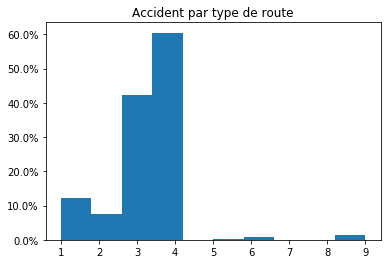

In [43]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FuncFormatter

def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(100 * y)

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'
    
# Make a normed histogram. It'll be multiplied by 100 later.
plt.hist(dfs[2]['catr'], normed=True)

# Create the formatter using the function to_percent. This multiplies all the
# default labels by 100, making them all percentages
formatter = FuncFormatter(to_percent)

# Set the formatter
plt.gca().yaxis.set_major_formatter(formatter)
plt.title('Accident par type de route')

plt.show()

On peut aussi sortir pour la base 3 ('lieux') les premières statistiques descriptives. Cela ne peut avoir aucun sens étant donné que les données sont numérisées

In [34]:
dfs[2].describe()

,Num_Acc,catr,v1,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
count,5.943200e+04,59432.000000,458.000000,59320.000000,59268.000000,24963.000000,24920.000000,59222.000000,59276.000000,59254.000000,57594.000000,57809.000000,59286.000000,59130.000000,59139.000000,59125.000000
mean,2.016000e+11,3.322133,2.113537,1.831339,2.038942,32.611626,385.797151,0.136706,1.114195,1.174537,5.141299,50.192755,1.214874,0.436411,1.126482,47.384169
std,1.715668e+04,1.146852,0.317595,0.773313,1.347160,118.285631,356.885231,0.568819,0.619874,0.735746,21.061400,62.855237,0.880435,1.348488,0.757122,49.315412
min,2.016000e+11,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.016000e+11,3.000000,2.000000,1.000000,1.000000,3.000000,50.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,2.016000e+11,4.000000,2.000000,2.000000,2.000000,11.000000,350.000000,0.000000,1.000000,1.000000,0.000000,50.000000,1.000000,0.000000,1.000000,3.000000
75%,2.016000e+11,4.000000,2.000000,2.000000,2.000000,31.000000,630.000000,0.000000,1.000000,1.000000,0.000000,73.000000,1.000000,0.000000,1.000000,99.000000
max,2.016001e+11,9.000000,3.000000,4.000000,13.000000,8370.000000,5660.000000,3.000000,4.000000,4.000000,907.000000,999.000000,9.000000,7.000000,5.000000,99.000000


Examinons 'hrm' qui correspond à l'heure du sinistre

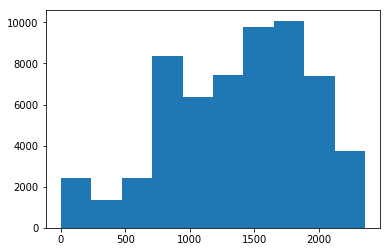

In [38]:
plt.hist( dfs[3]['hrmn'] )
plt.show()

Rajoutons des dictionnaires pour mieux expliquer les données

In [45]:
catr_dict = {
'1': 'Autoroute', 
'2': 'Nationale',
'3': 'Départementale',
'4': 'Voie Communale',
'5': 'Hors réseau public',
'6': 'Parc de stationnement',
'9': 'autre'}

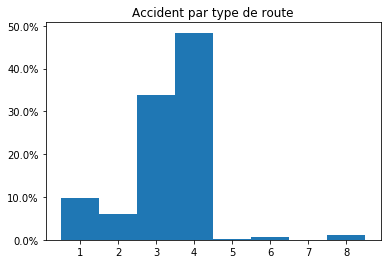

In [74]:
catr_labels = [
'Autoroute', 
'Nationale',
'Départementale',
'Voie Communale',
'Hors réseau public',
'Parc de stationnement',
'',
'Autre']

# Make a normed histogram. It'll be multiplied by 100 later.
plt.hist(dfs[2]['catr'], bins=range(1, 10), normed=True, align='left')
#plt.xticks( range(1,10), catr_labels,  rotation=-45)
formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(formatter)
plt.legend()
plt.title('Accident par type de route')
plt.show()